In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class plt_update_onclick:
    def __init__(self, fig, ax, x_train,y_train, dyn_items):
        self.fig = fig
        self.ax = ax
        self.x_train = x_train
        self.y_train = y_train
        self.dyn_items = dyn_items
        self.cid = fig.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        if event.inaxes == self.ax[1]:
            ws = event.xdata
            bs = event.ydata
            cst = compute_cost(self.x_train, self.y_train, ws, bs)

            # clear and redraw line plot
            self.ax[0].clear()
            f_wb = np.dot(self.x_train,ws) + bs
            mk_cost_lines(self.x_train,self.y_train,ws,bs,self.ax[0])
            plt_house_x(self.x_train, self.y_train, f_wb=f_wb, ax=self.ax[0])

            # remove lines and re-add on countour plot and 3d plot
            for artist in self.dyn_items:
                artist.remove()

            a = self.ax[1].scatter(ws,bs, s=100, color=dlblue, zorder= 10, label="cost with \ncurrent w,b")
            b = self.ax[1].hlines(bs, self.ax[1].get_xlim()[0],ws, lw=4, color=dlpurple, ls='dotted')
            c = self.ax[1].vlines(ws, self.ax[1].get_ylim()[0],bs, lw=4, color=dlpurple, ls='dotted')
            d = self.ax[1].annotate(f"Cost: {cst:.0f}", xy= (ws, bs), xytext = (4,4), textcoords = 'offset points',
                               bbox=dict(facecolor='white'), size = 10)

            #Add point in 3D surface plot
            e = self.ax[2].scatter3D(ws, bs,cst , marker='X', s=100)

            self.dyn_items = [a,b,c,d,e]
            self.fig.canvas.draw()


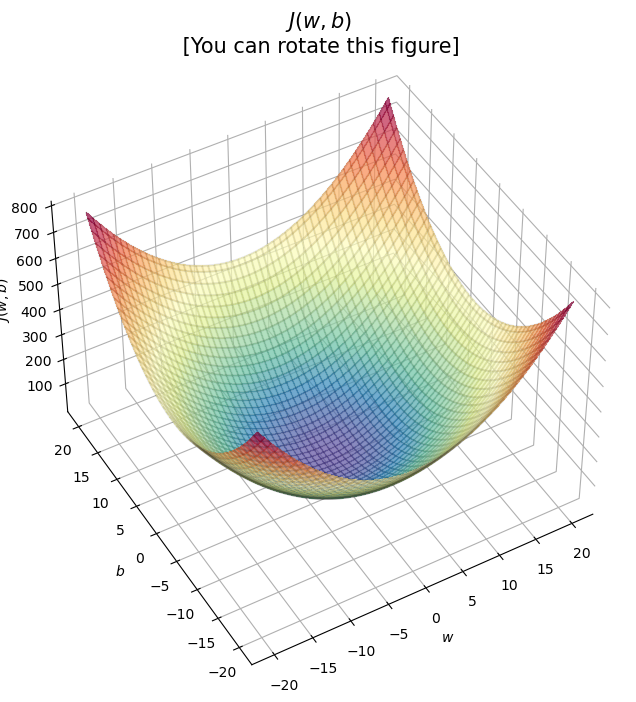

In [12]:
    fig = plt.figure(figsize=(8,8))
    #Plot configuration
    ax = fig.add_subplot(111, projection='3d')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_rotate_label(False)
    ax.view_init(45, -120)

    #Useful linearspaces to give values to the parameters w and b
    w = np.linspace(-20, 20, 100)
    b = np.linspace(-20, 20, 100)

    #Get the z value for a bowl-shaped cost function
    z=np.zeros((len(w), len(b)))
    j=0
    for x in w:
        i=0
        for y in b:
            z[i,j] = x**2 + y**2
            i+=1
        j+=1

    #Meshgrid used for plotting 3D functions
    W, B = np.meshgrid(w, b)

    #Create the 3D surface plot of the bowl-shaped cost function
    ax.plot_surface(W, B, z, cmap = "Spectral_r", alpha=0.7, antialiased=False)
    ax.plot_wireframe(W, B, z, color='k', alpha=0.1)
    ax.set_xlabel("$w$")
    ax.set_ylabel("$b$")
    ax.set_zlabel("$J(w,b)$", rotation=90)
    ax.set_title("$J(w,b)$\n [You can rotate this figure]", size=15)

    plt.show()